# Perceptron Model
>dataset link : https://www.kaggle.com/datasets/akram24/social-network-ads
<br><br>

<br>

### Importing Libraries
* `numpy` is used for numerical operations in Python.
* `pandas` is used for data manipulation and analysis.
* `matplotlib.pyplot` is used for creating visualizations.
* `seaborn` is used for statistical data visualization.
* `sklearn.model_selection.train_test_split` is used to split the dataset into training and testing sets.
* `sklearn.preprocessing.StandardScaler` is used to standardize features by removing the mean and scaling to unit variance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<br>

### Loading and Preprocessing Data
* Reads a CSV file into a pandas DataFrame.
* Converts the "Gender" column into dummy variables (one-hot encoding).
* Drops unnecessary columns ("Gender", "User ID", "Female") from the DataFrame.
* Renames the remaining dummy variable column ("Male") to "Gender".


In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data = pd.concat([data, pd.get_dummies(data["Gender"]).astype(int)], axis=1).drop(["Gender", "User ID", "Female"], axis=1)
data.rename(columns={'Male': 'Gender'}, inplace=True)

<br>

### Data Visualization: Pairplot
* Creates a pairplot using seaborn's `pairplot` function to visualize pairwise relationships in the dataset.
* The `hue` parameter is set to 'Purchased' to color the data points based on the target variable.


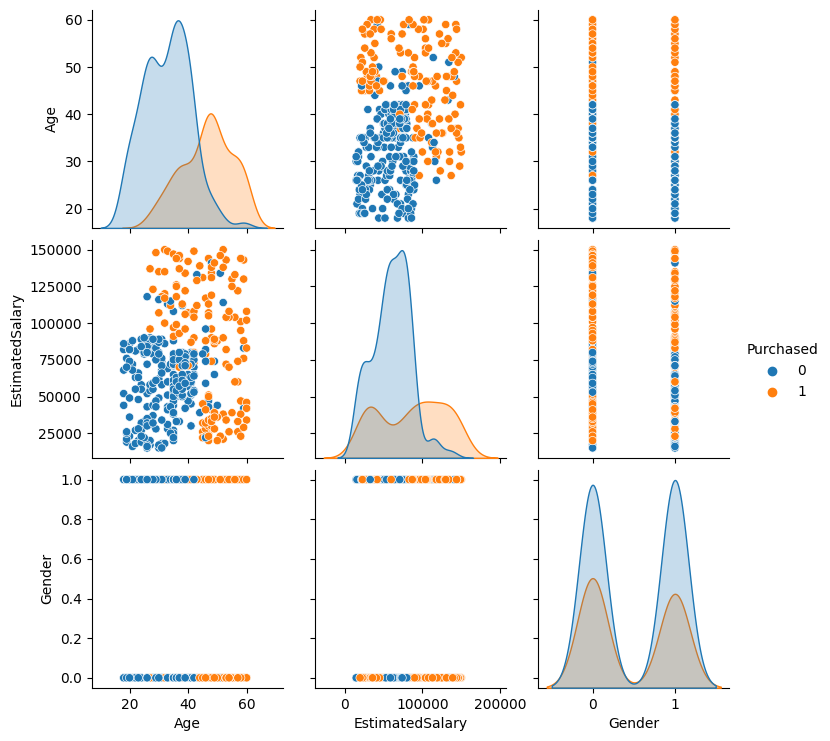

In [3]:
sns.pairplot(data, hue='Purchased')

<br>

### Data Visualization: Correlation Heatmap
* Calculates the correlation matrix using NumPy's `corrcoef` function.
* Creates a heatmap using seaborn's `heatmap` function to visualize the correlation matrix.
* Sets annotations to display correlation coefficients with two decimal places.
* Sets custom xticklabels and yticklabels for better interpretation.
* Sets a title for the heatmap.


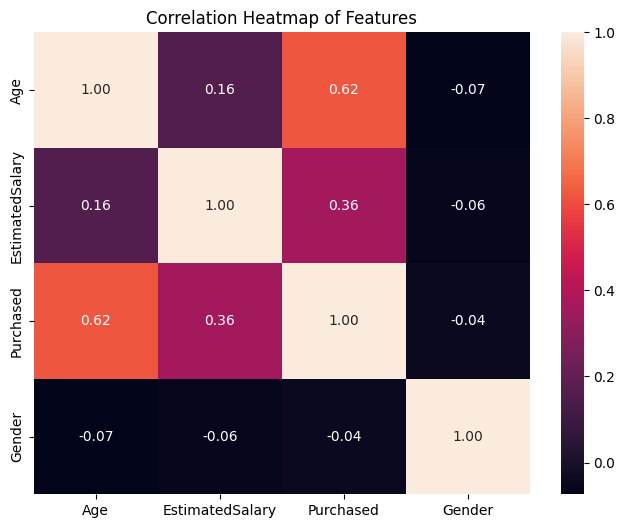

In [4]:
correlation_matrix = np.corrcoef(data, rowvar=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
           xticklabels=['Age', 'EstimatedSalary', 'Purchased', 'Gender'],
            yticklabels=['Age', 'EstimatedSalary', 'Purchased', 'Gender'])
plt.title('Correlation Heatmap of Features')
plt.show()

<br>

### Dropping Feature: Gender
* Drops the 'Gender' feature from the DataFrame.
* Justification: This feature has the least correlation with the target column (Purchased), as observed from the correlation heatmap.


In [5]:
data = data.drop(['Gender'], axis=1)

<br>

### Data Visualization: Scatter Plot
* Creates a scatter plot using Matplotlib's `scatter` function to visualize the relationship between 'Age' and 'EstimatedSalary'.
* Colors the data points based on the 'Purchased' column to differentiate between different classes.


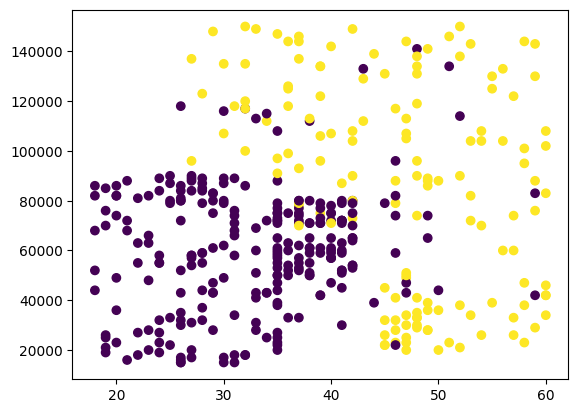

In [6]:
plt.scatter(x=data['Age'], y=data['EstimatedSalary'], c=data['Purchased'])

<br>

### Data Preparation: Feature and Target Variables
* Assigns feature variables to X by dropping the 'Purchased' column from the DataFrame and converting the result to a NumPy array.
* Assigns the target variable to y by selecting only the 'Purchased' column from the DataFrame and converting it to a NumPy array.


In [7]:
X = data.drop(['Purchased'], axis=1).to_numpy()
y = data['Purchased'].to_numpy()

<br>

### Train-Test Split
* Splits the feature and target variables into training and testing sets using the `train_test_split` function from `sklearn.model_selection`.
* The test size is set to 33% of the data, and a random state of 42 is used for reproducibility.
* X_train and y_train represent the feature and target variables for training, respectively.
* X_test and y_test represent the feature and target variables for testing, respectively.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<br>

### Feature Scaling
* Initializes a `StandardScaler` object to standardize the feature variables.
* Applies the `fit_transform` method to the training set (X_train) to compute the mean and standard deviation and then standardize the features.
* Applies the `transform` method to the testing set (X_test) using the parameters learned from the training set to standardize the features.


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<br>

### Perceptron Class
* Defines a Perceptron class for binary classification tasks.
* Methods:
  - `__init__`: Initializes the Perceptron with None weights and bias.
  - `sigmoid`: Defines the sigmoid activation function.
  - `initialize_weights`: Initializes weights and bias using small random values.
  - `linear_prediction`: Calculates the linear prediction based on input features.
  - `fit`: Trains the Perceptron using gradient descent to minimize the loss function.
  - `predict`: Predicts the class labels based on input features.
  - `accuracy`: Calculates the accuracy of predictions.
  - `loss`: Calculates the mean squared error loss.
  - `print_weights_and_bias`: Prints the weights and bias of the trained Perceptron.

The Perceptron class can be used for training and predicting binary classification tasks.


In [10]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_weights(self, n_features):
        epsilon = 1e-4
        self.weights = epsilon*np.random.randn(n_features)
        self.bias = epsilon*np.random.randn()

    def linear_prediction(self, X):
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        if self.weights is None:
            self.initialize_weights(X.shape[1])
        m = X.shape[0]
        for i in range(num_iterations):
            linear_pred = self.linear_prediction(X)
            y_pred = self.sigmoid(linear_pred)
            loss = y_pred - y
            dW = (1 / m) * np.dot(X.T, loss)
            db = (1 / m) * np.sum(loss)
            self.weights -= learning_rate * dW
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_pred = self.linear_prediction(X)
        y_pred = self.sigmoid(linear_pred)
        return np.where(y_pred <= 0.5, 0, 1)

    def accuracy(self, y_pred, y_true):
        return np.sum(y_pred == y_true) / len(y_true)

    def loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def print_weights_and_bias(self):
        print("Weights:", self.weights)
        print("Bias:", self.bias)


<br>

### Initialize and Train the Perceptron Model
* Initializes a Perceptron object.
* Trains the Perceptron model using the training data (X_train, y_train).

### Print Weights and Bias
* Prints the learned weights and bias of the trained Perceptron model.

### Make Predictions
* Makes predictions on the test data (X_test) using the trained Perceptron model.

### Calculate Accuracy
* Calculates the accuracy of the predictions made by the Perceptron model.

### Calculate Loss
* Calculates the loss (mean squared error) of the predictions made by the Perceptron model.


In [11]:
# Initialize and train the perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Print weights and bias
perceptron.print_weights_and_bias()

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
acc = perceptron.accuracy(y_pred, y_test)
print("Accuracy of the model:", acc)

# Calculate loss
loss = perceptron.loss(y_pred, y_test)
print("Loss of the model:", loss)

Weights: [1.14385295 0.71476677]
Bias: -0.7028040849423843
Accuracy of the model: 0.8484848484848485
Loss of the model: 0.15151515151515152


<br>

### Confusion Matrix Visualization
* Constructs a confusion matrix using Pandas' `crosstab` function to compare actual and predicted labels.
* Uses seaborn's `heatmap` function to visualize the confusion matrix as a heatmap.
* Sets annotations and formats the values as integers.
* Sets custom xticklabels and yticklabels for better interpretation.

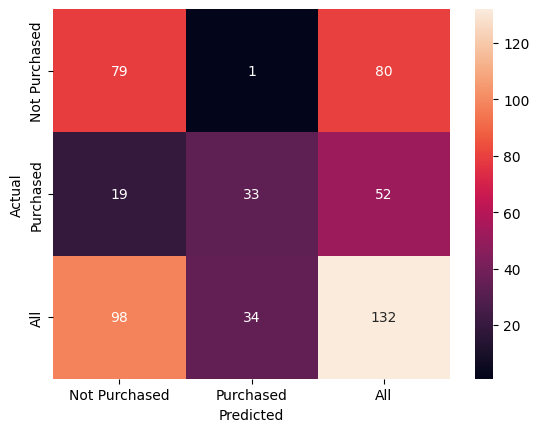

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.0f',
            xticklabels=['Not Purchased', 'Purchased', 'All'],
            yticklabels=['Not Purchased', 'Purchased', 'All'])
plt.show()